# 1. Korelacja
$$\overline{x}=\frac{1}{n}\sum_{i=1}^{n}{x_i},\space\overline{y}=\frac{1}{n}\sum_{i=1}^{n}{y_i}$$  

## współczynnik korelacji liniowej Pearsona

$$r_{xy}=\frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\overline{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\overline{y})^2}}$$

$$r_{XY}=\frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}$$

## współczynnik korelacji rangowej Spearmana
$RX$, $RY$ rangi zmiennych $X$ i $Y$

$$\rho=\frac{\text{cov}(RX,RY)}{\sqrt{\text{var}(RX)\text{var}(RY)}}$$

$$\rho=1-\frac{6\sum_{i=1}^{n}d_{i}^{2}}{n(n^2-1)}$$

gdzie $$d_i=R(x)_{i}-R(y)_i, \space \space i=1,\ldots,n$$ oraz $R(x)_i$ oznacza rangę $i$-tej obserwacji z $X$

## korelacja Pearsona vs korelacja Spearmana

korelacja Pearsona = korelacja Spearmana = 1

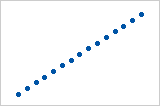

korelacja Pearsona = korelacja Spearmana = -1

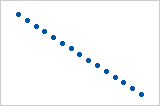

korelacja Pearsona < korelacja Spearmana = 1

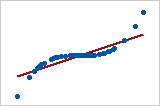

https://en.wikipedia.org/wiki/Correlation#/media/File:Correlation_examples2.svg

https://en.wikipedia.org/wiki/Correlation

źródłó: wikipedia.org

In [4]:
import numpy as np
import pandas as pd
np.random.seed(1)

In [4]:
numeric=np.random.normal(size=100)

In [5]:
category=np.random.choice(['Ania', 'Kasia', 'Tomek'], size=100)

In [6]:
dict1={"Ania":1, "Kasia": 2, "Tomek":3}

In [7]:
np.corrcoef(pd.Series(category).map(dict1), numeric)[0,1]

print("pearson %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="pearson"))
print("spearman %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="spearman"))

pearson 0.0831
spearman 0.0809


In [8]:
#przeskalowanie wartości
dict1={"Ania":10, "Kasia": 20, "Tomek":30}

In [9]:
np.corrcoef(pd.Series(category).map(dict1), numeric)[0,1]
print("pearson %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="pearson"))
print("spearman %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="spearman"))

pearson 0.0831
spearman 0.0809


In [10]:
# zamiana kolejności na odwrotną  -- analogia do zmiennej binarnej
dict1={"Ania":3, "Kasia": 2, "Tomek":1}
np.corrcoef(pd.Series(category).map(dict1), numeric)[0,1]
print("pearson %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="pearson"))
print("spearman %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="spearman"))

pearson -0.0831
spearman -0.0809


In [11]:
# zamiana kolejności
dict1={"Ania":3, "Kasia": 1, "Tomek":2}
np.corrcoef(pd.Series(category).map(dict1), numeric)[0,1]
print("pearson %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="pearson"))
print("spearman %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="spearman"))

pearson -0.1984
spearman -0.1913


In [12]:
# zamiana kolejności
dict1={"Ania":2, "Kasia": 1, "Tomek":3}
np.corrcoef(pd.Series(category).map(dict1), numeric)[0,1]
print("pearson %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="pearson"))
print("spearman %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="spearman"))

pearson -0.1063
spearman -0.0970


In [13]:
# zamiana kolejności
dict1={"Ania":2, "Kasia": 3, "Tomek":1}
np.corrcoef(pd.Series(category).map(dict1), numeric)[0,1]
print("pearson %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="pearson"))
print("spearman %1.4f" % pd.Series(numeric).corr(pd.Series(category).map(dict1), method="spearman"))

pearson 0.1063
spearman 0.0970


# 2. Metody wyboru zmiennych do budowy modeli

https://scikit-learn.org/stable/modules/feature_selection.html

źróło: scikit-learn.org

## 2.1 Removing features with low variance¶

In [14]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

df = pd.DataFrame([[0, 0, 1], [0, 1, 0], [0, 0, 0], [10, 1, 1], [0, 1, 0], [0, 1, 1]])
print("df=\n", df)
threshold = 0.2
print("threshold=", )

sel = VarianceThreshold(threshold=threshold)
sel.fit_transform(df)

df=
     0  1  2
0   0  0  1
1   0  1  0
2   0  0  0
3  10  1  1
4   0  1  0
5   0  1  1
threshold=


array([[ 0,  0,  1],
       [ 0,  1,  0],
       [ 0,  0,  0],
       [10,  1,  1],
       [ 0,  1,  0],
       [ 0,  1,  1]], dtype=int64)

## 2.2 Jednoczynnikowy wybór

In [25]:
# pip install feature_engine

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SelectBySingleFeaturePerformance

X, y = load_iris(return_X_y=True)

ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\Mikolaj\anaconda3\lib\site-packages\sklearn\base.py)

In [3]:
df = pd.DataFrame(X)
df['species'] = y
df=df[(df['species']==0) | (df['species']==1)].reset_index(drop=True)

NameError: name 'pd' is not defined

In [21]:
X = df.loc[:,0:3]
y = df['species']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
sel1 = SelectBySingleFeaturePerformance(
    estimator=RandomForestClassifier(random_state=1),
    scoring='roc_auc',
    cv=3,
    threshold=1,
)

In [26]:
X_train_t = sel1.fit_transform(X_train, y_train)
X_test_t = sel1.transform(X_test)

In [27]:
X_test_t.shape

(25, 2)

## 2.3 Univariate feature selection

In [29]:
sel2 = SelectKBest(f_classif, k=2)
X_train_t = sel2.fit_transform(X_train, y_train)
X_test_t = sel2.transform(X_test)

In [30]:
X_test_t.shape

(25, 2)

## 2.3 Sekwencyjny wybór zmiennych - Sequential Feature Selection

## 2.4 Selekcja w oparciu o model

### 2.4.1 W oparciu o feature_importance w oparciu o modele drzewiaste / las losowy - Tree-based feature selection

In [31]:
from sklearn.feature_selection import SelectFromModel
# class sklearn.feature_selection.SelectFromModel(estimator, *, threshold=None, 
#            prefit=False, norm_order=1, max_features=None, importance_getter='auto')[source]

In [32]:
clf = RandomForestClassifier(random_state=42) # lub ExtraTreesClassifier
clf = clf.fit(X_train, y_train)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_train_t = model.transform(X_train)
X_train_t.shape

(75, 2)

In [33]:
X_test_t = model.transform(X_test)
X_test_t.shape

(25, 2)

In [34]:
X_train.shape

(75, 4)

## 2.4.2 Wybór z wykorzystaniem Lasso lub Ridge L1, L2 -based feature selection

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#simple logistic regression with lasso regularization
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)

log_clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_train_t = model.transform(X_train)
X_train_t.shape

(75, 2)

## 2.4.3 Wybór w parciu o model LR oraz RFE

## Logistic regression with lasso regularization and recursive feature elimination

In [36]:
from sklearn.feature_selection import RFE

log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)

In [37]:
selector = RFE(estimator=log_clf, n_features_to_select=1, step=1)

selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                                 random_state=42, solver='liblinear'),
    n_features_to_select=1)

In [38]:
X_train_t = selector.transform(X_train)
X_train_t.shape

(75, 1)

In [39]:
X_test_t = selector.transform(X_test)
X_test_t.shape

(25, 1)

## Wybór z wykrozystaniem pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('selection_auc', sel1),
  ('feature_selection', selector),
  ('classification', RandomForestClassifier())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selection_auc',
                 SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(random_state=1),
                                                  threshold=1)),
                ('feature_selection',
                 RFE(estimator=LogisticRegression(C=0.1,
                                                  class_weight='balanced',
                                                  penalty='l1', random_state=42,
                                                  solver='liblinear'),
                     n_features_to_select=1)),
                ('classification', RandomForestClassifier())])

In [41]:
pipe.predict(X_train)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0])

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

1.0